Analysis-

There are less Pyber drivers and riders in the rural area than any other areas. So it does not look like the number 
of drivers correlates to average fare.

The average fare price is higher in rural areas than relative to any other areas. That is the result of having less 
number of drivers in the rural areas compare to any other area, and because of that they are able to charge more than 
the average price that a city Pyber driver charges.

There is an increase of drivers when there is a increase of the type of city. This make sense due to rural areas 
having large amount of space that people can keep their own vechiles. Whereas, if you live in an urban area, 
there is no space to keep cars due to the high volume of poeple, therefore they rely on services such as Pyber to
get around.

In [74]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merged_df = pd.merge(ride_df, city_df, on = "city", how = "left")

In [75]:
# Display the data table for preview
merged_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2018-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2018-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2018-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2018-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2018-03-09 06:26:29,42.81,5327642267789,33,Urban


## Bubble Plot of Ride Sharing Data

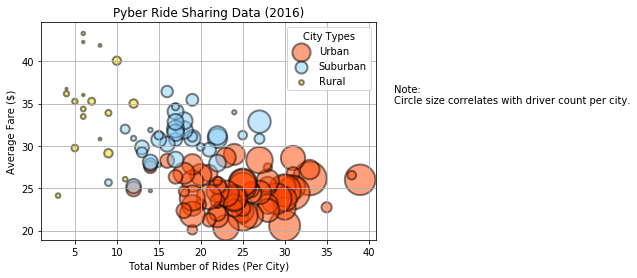

In [76]:
# Obtain the x and y coordinates for each of the three city types

#separtes the dataframe by type of the city
urban_df = merged_df.loc[merged_df['type'] == 'Urban']
suburban_df = merged_df.loc[merged_df['type'] == 'Suburban']
rural_df = merged_df.loc[merged_df['type'] == 'Rural']

#retrieves the city names, per each city type and converts it to a list
urban_city_list = urban_df['city'].value_counts().index.tolist()
suburban_city_list = suburban_df['city'].value_counts().index.tolist()
rural_city_list = rural_df['city'].value_counts().index.tolist()

x_urban = []
y_urban = []
urban_size = []
x_suburban = []
y_suburban = []
suburban_size = []
x_rural = []
y_rural = []
rural_size = []

#buillds the x and y, coordinates for each city per type of city 
for x in urban_city_list:
    temp_df = urban_df.loc[urban_df['city'] == x]
    
    x_urban.append(len(temp_df.index))
    
    y_urban.append(temp_df['fare'].mean())
    
    urban_size.append(temp_df['driver_count'].sum())
    
for x in suburban_city_list:
    temp_df = suburban_df.loc[suburban_df['city'] == x]
    x_suburban.append(len(temp_df.index))
    y_suburban.append(temp_df['fare'].mean())
    suburban_size.append(temp_df['driver_count'].sum())
    
for x in rural_city_list:
    temp_df = rural_df.loc[rural_df['city'] == x]
    x_rural.append(len(temp_df.index))
    y_rural.append(temp_df['fare'].mean())
    rural_size.append(temp_df['driver_count'].sum())
    
# Build the scatter plots for each city types
plt.scatter(x_urban, y_urban, s = [i * .5 for i in urban_size], alpha = .5, linewidths = 2, edgecolors = 'black', c = '#ff4500')
plt.scatter(x_suburban, y_suburban, s = [i * .75 for i in suburban_size], alpha = .5, linewidths = 2, edgecolors = 'black', c = '#87cefa')
plt.scatter(x_rural, y_rural, s = rural_size, alpha = .5, linewidths = 2, edgecolors = 'black', c = 'Gold')


# Incorporate the other graph properties
plt.grid(True)
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')


# Create a legend
plt.legend(('Urban','Suburban', 'Rural'), markerscale = .75, title = 'City Types')

# Incorporate a text label regarding circle size
plt.text(43,35, 'Note: \nCircle size correlates with driver count per city.')


# Save Figure

#Show plot
plt.show()

## Total Fares by City Type

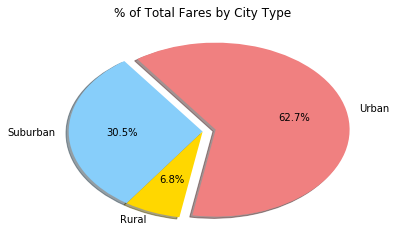

In [77]:
# Calculate Type Percents
total_urban_fare = urban_df['fare'].sum()
total_suburban_fare = suburban_df['fare'].sum()
total_rural_fare = rural_df['fare'].sum()

x = [total_urban_fare, total_suburban_fare, total_rural_fare]


# Build Pie Chart
plt.pie(x, labels = ["Urban", 'Suburban', 'Rural'], 
           explode =(.1,0,0),  colors = ['#f08080', '#87cefa', 'Gold'], 
           shadow = True, startangle = 260, autopct = "%1.1f%%")
plt.title('% of Total Fares by City Type')


# Save Figure

plt.show()


## Total Rides by City Type

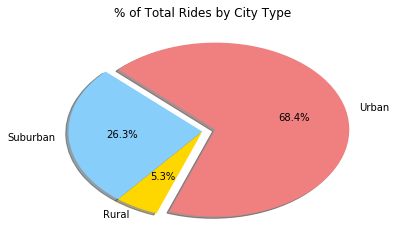

In [88]:
# Calculate Ride Percents
urban_total_ride = len(urban_df.index)
suburban_total_ride = len(suburban_df.index)
rural_total_ride = len(rural_df.index)
x = [urban_total_ride, suruban_total_ride, rural_total_ride]

# Build Pie Chart
plt.pie(x, labels = ['Urban', 'Suburban', 'Rural'], explode =(.1,0,0), 
           colors = ['lightcoral', 'lightskyblue', 'Gold'], shadow = True,
           autopct = '%1.1f%%', startangle = 250)

plt.title('% of Total Rides by City Type')


# Save Figure

plt.show()

## Total Drivers by City Type

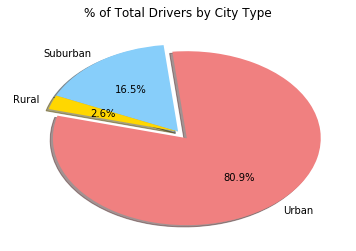

In [93]:
# Calculate Driver Percents
urban_total_driver_count = []
suburban_total_driver_count = []
rural_total_driver_count = []

for x in urban_city_list:
    temp_df = urban_df.loc[urban_df['city'] == x]
    urban_total_driver_count.append(temp_df['driver_count'].iloc[0])
    
for x in suburban_city_list:
    temp_df = suburban_df.loc[suburban_df['city'] == x]
    suburban_total_driver_count.append(temp_df['driver_count'].iloc[0])
    
for x in rural_city_list:
    temp_df = rural_df.loc[rural_df['city'] == x]
    rural_total_driver_count.append(temp_df['driver_count'].iloc[0])

x = [sum(urban_total_driver_count), sum(suburban_total_driver_count), sum(rural_total_driver_count)]



# Build Pie Charts
plt.pie(x, labels = ["Urban", 'Suburban', 'Rural'],explode =(.1,0,0), 
           colors = ['#f08080', '#87cefa', 'Gold'], shadow = True, 
           startangle = 165, autopct = "%1.1f%%")
plt.title('% of Total Drivers by City Type')


# Save Figure

plt.show()